<a href="https://colab.research.google.com/github/bankadilasha11/MACHINE-LEARNING/blob/master/uber_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np 
import pandas as pd 

In [20]:
df=pd.read_csv("datasets_1026_1855_My Uber Drives - 2016.csv", index_col=None)

In [21]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [23]:
df.shape

(1156, 7)

In [24]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [27]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [19]:
#add visualisation library
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
df['PURPOSE*'].unique()
df['PURPOSE*'].replace(np.nan, 'Other', inplace=True)

In [36]:
# START DATE and END_DATE have string format. Convert it to datetime object
# You will discover that the last row contains string values. Just remove it from DataFrame
df[-5:]
df = df[:-1]
df.loc[:, 'START_DATE*'] = df['START_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))
df.loc[:, 'END_DATE*'] = df['END_DATE*'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [41]:
#Calculate the time for the rides and convert it to numbers
df['DIFF'] = df['END_DATE*'] - df['START_DATE*']
df.loc[:, 'DIFF'] = df['DIFF'].apply(lambda x: pd.Timedelta.to_pytimedelta(x).days/(24*60) + pd.Timedelta.to_pytimedelta(x).seconds/60)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DIFF
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


#Question1: How many miles was earned per category and purpose ?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


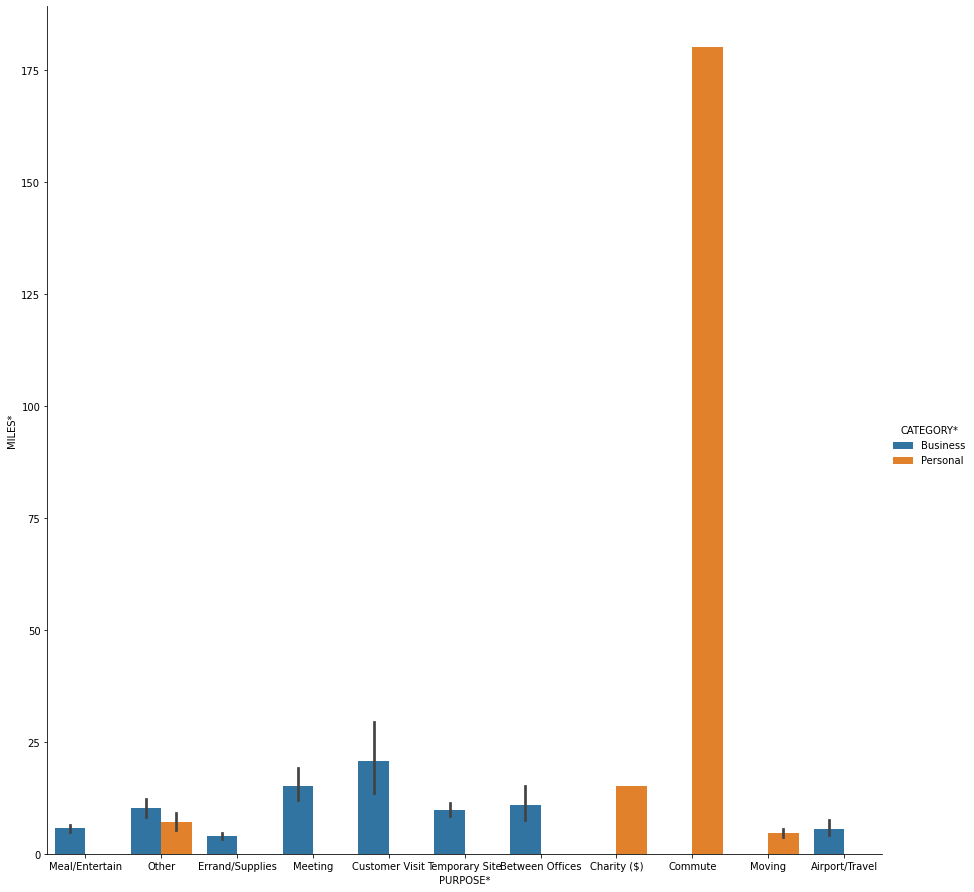

In [65]:
#Question1: 
g = sns.factorplot(x="PURPOSE*", y="MILES*", hue="CATEGORY*", data=df,
                   size=12.50,kind="bar")
#from the graph is clearly seen that the main contributors for miles are:
#in Business category: meetings and customer; private: commute and charity

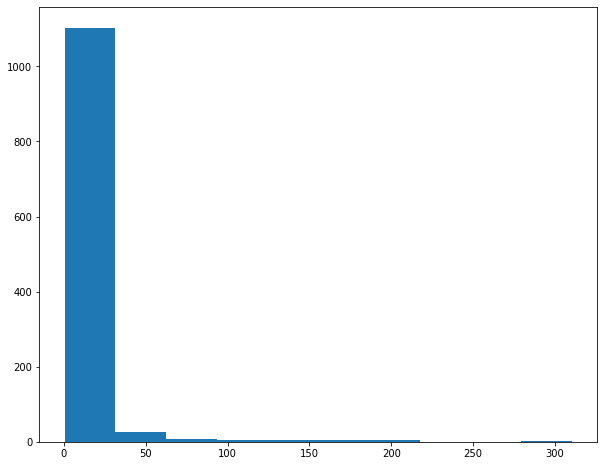

In [84]:
plt.figure(figsize=(10,8))
plt.hist(df['MILES*'])
plt.show()

# Question2: What is percentage of business miles vs personal vs. Meals ?

In [105]:
#Question2:
totals = df.groupby('CATEGORY*', as_index=False).agg({'MILES*': 'sum'})
totals['PERCENTAGE'] = (totals['MILES*']/df['MILES*'].sum())*100
totals

,CATEGORY*,MILES*,PERCENTAGE
0,Business,11432.4,94.093053
1,Personal,717.7,5.906947


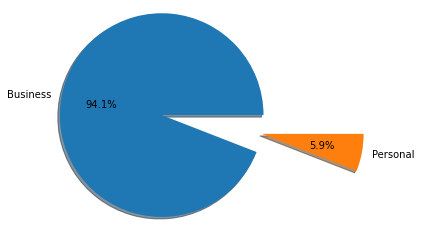

In [138]:
sizes = np.array(totals['PERCENTAGE'])
category = np.array(totals['CATEGORY*'])
plt.pie(sizes,labels=category,autopct='%1.1f%%',shadow=True,explode=[1,0])
plt.axis("equal")
plt.show()

In [71]:
import matplotlib.pyplot as plt

# Question3: How much time was spend for each drive per category and purpose ?

In [143]:
#Question3:
df.groupby(['CATEGORY*', 'PURPOSE*'])['DIFF'].sum() / df.groupby(['CATEGORY*'])['DIFF'].sum()
#the most time spend in the cab for business - meeting/other, personal - commute/other

CATEGORY*  PURPOSE*       
Business   Airport/Travel     0.003101
           Between Offices    0.018250
           Customer Visit     0.134195
           Errand/Supplies    0.066044
           Meal/Entertain     0.102584
           Meeting            0.221113
           Other              0.408111
           Temporary Site     0.046600
Personal   Charity ($)        0.017143
           Commute            0.117460
           Moving             0.038095
           Other              0.827302
Name: DIFF, dtype: float64